# modelo de machine learning aplicado a la data

- utilizaremos un modelo Ml para recomendacion de films
- la definicion de coseno de similitud
- el modelo KNN

In [48]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from scipy import spatial
import operator

In [3]:
# documento original
df=pd.read_csv(r'C:\Users\LENOVO\Downloads\movies_consulta.csv')

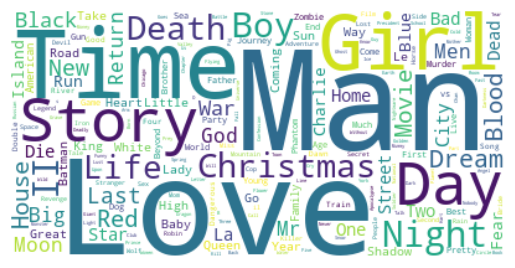

In [38]:
# se relaizara un muestreo aletorio del dataset (limite capacidad de memoria ) con n=2000 filas y columna invariable
df_muestra=df.sample(2000 ,random_state=1) 
text2 = " ".join(title for title in df_muestra.title)

# creamos el wordcloud para resaltar la prominenca de palabras se usara el campo title

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# output

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()



In [40]:
df_muestra.isna().sum()

belong_collection.id         0
belong_collection.name       0
budget                       0
genres                       0
id                           0
original_language            0
overview                    40
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      8
spoken_languages             0
status                       3
tagline                   1074
title                        0
vote_average                 0
vote_count                   0
release_year                 0
return                       0
cast                         0
crew                         0
dtype: int64

In [41]:
df_muestra=df_muestra.reset_index(drop=True) 

In [42]:
# conversion de str  listas 
import ast
def conversion_listas_Dict(columna): 
    o=[]
    for i in range(len(columna)):
        p=[]
        for j in range(len(ast.literal_eval(columna[i]))): 
            p.append(ast.literal_eval(columna[i])[j]['name'])
        o.append(p) # lista de listas
    ser1=pd.Series(o)
    return ser1

In [43]:
# utilizaremos como variable genres
df_muestra['genres']=conversion_listas_Dict(df_muestra['genres'])

# implementacion de el algoritmo k-NN
- pasos de procesamiento 
- determinar variables independientes y dependientes
- ajuste de algoritmo KNN al conjunto de entrenamiento
- predecir el resultado de la prueba
- exactitud de la prueba
- visalizacion del resultado

In [44]:
# valores unico de genres
df_muestra['genres'].explode('genres').unique()

array(['Comedy', 'Romance', 'Drama', 'Foreign', 'Horror',
       'Science Fiction', 'Action', 'Music', 'Documentary', 'Thriller',
       'Crime', 'Mystery', 'Adventure', 'Western', 'History', 'War',
       'Fantasy', 'Family', 'Animation', 'sin_dat', 'TV Movie'],
      dtype=object)

In [45]:
#conversion de la columna genero a binario en listas

h=[]
#p=0
for i in range(len(df_muestra['genres'])): #dfmuestra['genres]
     binaryList = []
     for j in range(len(df_muestra['genres'].explode('genres').unique())):
       try:
         if  df_muestra['genres'].explode('genres').unique()[j] in df_muestra['genres'][i] :
             binaryList.append(1)
         else:
             binaryList.append(0)
       except:
             binaryList.append(0)
     h.append(binaryList)
df_muestra['genres_bin']=pd.Series(h)


In [47]:
df_muestra['genres_bin'].head(2)

0    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [51]:
# similitud entre films por medio de sus IDs  , coseno de smilitud 

def Similarity(movieId1, movieId2):
    a = df_muestra.iloc[movieId1]
    b = df_muestra.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)

    return genreDistance

In [52]:
#similitud entre las peliculas de la fila 2 y la fila 7
Similarity(2,7) # la similitud es muy alta cuando la distancia es poca

0.2928932188134524

In [54]:
# extraemos y generamos  variables que se utilizaran en nuestro modelo
new_id = list(range(0,df_muestra.shape[0]))
df_muestra['new_id']=new_id
movies=df_muestra[['title','genres','vote_average','genres_bin','new_id']]
movies.head()

,title,genres,vote_average,genres_bin,new_id
0,All Roads Lead to Rome,"[Comedy, Romance]",4.7,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,Siddharth,"[Drama, Foreign]",9.0,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,Alien 2: On Earth,"[Horror, Science Fiction]",2.8,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,Yakuza Apocalypse,"[Horror, Action]",5.8,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
4,Sisters of the Gion,[Drama],6.7,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4


In [55]:
# modelo ML  de recomendacion 
def predict_score(name):
    new_movie = movies[movies['title'].str.contains(name)].iloc[0].to_frame().T
    print('eleccion de la pelicula: ',new_movie.title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors
    K = 5
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\n peliculas recomendadas: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Generos: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))


In [56]:
predict_score('Siddharth')

eleccion de la pelicula:  Siddharth

peliculas recomendadas: 

Kawa | Generos: 'Drama','Foreign' | Rating: 5.0
The Circle | Generos: 'Drama','Foreign' | Rating: 6.6
Gravity's Clowns | Generos: 'Drama','Foreign' | Rating: 6.7
Cameraman Ganga Tho Rambabu | Generos: 'Foreign','Drama' | Rating: 4.9
Page 3 | Generos: 'Drama','Foreign' | Rating: 6.4


In [57]:
#exportamos el documneto movies para su consulta
movies.to_csv('movies1.csv', encoding='utf-8', index=False)